In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of samples
n_samples = 1000

figures_path = os.path.join(os.getcwd(), "figures")

# Define the data generating process
def generate_data(n_samples, sigma_squared, mu=0, rho=0):
    X1 = np.random.normal(mu, np.sqrt(sigma_squared), n_samples)
    noise = np.random.normal(0, np.sqrt(sigma_squared), n_samples)
    Y = X1 + noise
    X2 = Y + np.random.normal(0, 1, n_samples)
    if rho != 0:
        Y = X1 + rho * X1 + noise * np.sqrt(1 - rho**2)
    return X1, X2, Y

## Train Data

In [21]:
# Simulate data without shift
X1, X2, Y = generate_data(n_samples, sigma_squared=10)

## Test Data

### 1) Variance Shift

In [22]:
# Simulate data with variance shift
X1_var_shift, X2_var_shift, Y_var_shift = generate_data(n_samples, sigma_squared=20)

### 2) Mean Shift

In [23]:
# Simulate data with mean shift
X1_mean_shift, X2_mean_shift, Y_mean_shift = generate_data(n_samples, sigma_squared=10, mu=5)

### 3) Correlation Shift

In [24]:
# Simulate data with correlation change
X1_corr_change, X2_corr_change, Y_corr_change = generate_data(n_samples, sigma_squared=10, rho=0.5)

## Plot Different Shifts

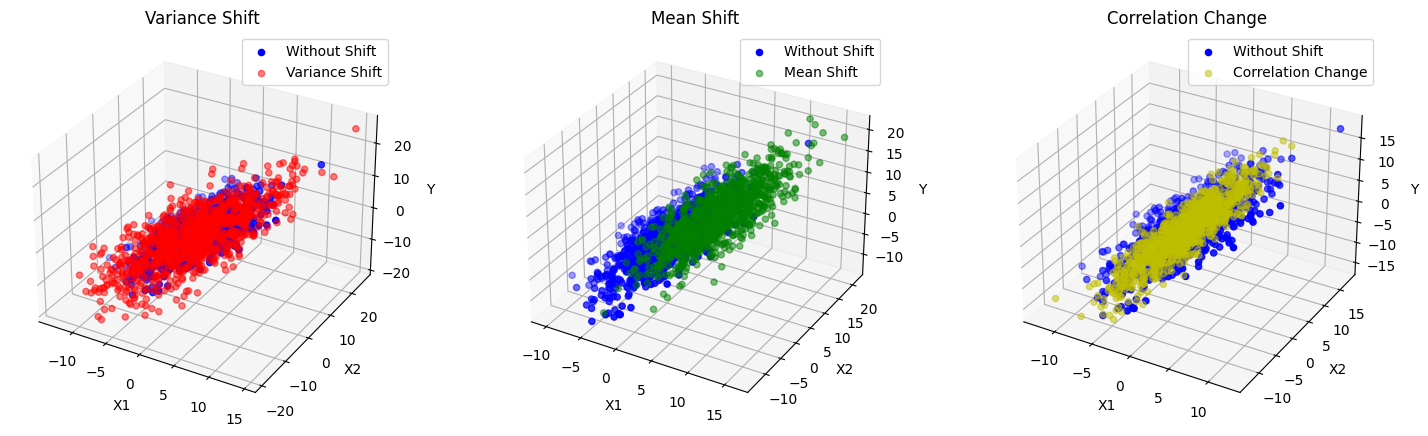

In [25]:
# Create 3D plots for each shift
fig = plt.figure(figsize=(18, 5))

# Plot without shift
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X1, X2, Y, color='b', label='Without Shift')
ax1.scatter(X1_var_shift, X2_var_shift, Y_var_shift, color='r', alpha=0.5, label='Variance Shift')
ax1.set_title('Variance Shift')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Y')
ax1.legend()

# Plot with mean shift
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X1, X2, Y, color='b', label='Without Shift')
ax2.scatter(X1_mean_shift, X2_mean_shift, Y_mean_shift, color='g', alpha=0.5, label='Mean Shift')
ax2.set_title('Mean Shift')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Y')
ax2.legend()

# Plot with correlation change
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X1, X2, Y, color='b', label='Without Shift')
ax3.scatter(X1_corr_change, X2_corr_change, Y_corr_change, color='y', alpha=0.5, label='Correlation Change')
ax3.set_title('Correlation Change')
ax3.set_xlabel('X1')
ax3.set_ylabel('X2')
ax3.set_zlabel('Y')
ax3.legend()

# export the plot
plt.savefig(os.path.join(figures_path, 'shifts_examples.png'))
plt.show()